In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster, cophenet
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist
from scipy import stats
from sklearn.metrics import silhouette_samples, silhouette_score, adjusted_rand_score, adjusted_mutual_info_score
from sklearn.neighbors import NearestCentroid
from sklearn.cluster import AgglomerativeClustering

from scipy.stats import spearmanr
from scipy.stats import pearsonr

In [2]:
def spec_COR(spec1,spec2):
    pcorr, _ = pearsonr(spec1,spec2)
    scorr, _ = spearmanr(spec1,spec2)
    return pcorr, scorr

def pairwise_COR(df,i0):
    pearsonCOR=[]
    spearmanCOR =[]
    for i in range(df.shape[0]):
        for j in range(i+1,df.shape[0]):
            result = spec_COR(df.iloc[i,i0:],df.iloc[j,i0:])
            pearsonCOR.append(result[0])
            spearmanCOR.append(result[1])
    return pearsonCOR, spearmanCOR

def COR_matrix(df,i0):
    COR_pearson = pd.DataFrame()
    COR__spearman= pd.DataFrame()
    for i in range(df.shape[0]):
        #print(i)
    #if i%10 == 0:
        #print(i*100/df.shape[0],'%')
        for j in range(df.shape[0]):
            #print(j)
            result =spec_COR(df.iloc[i,i0:],df.iloc[j,i0:])
            COR_pearson.loc[i,j] = result[0]
            COR__spearman.loc[i,j] = result[1]
    return COR_pearson, COR__spearman

#### Load dataset
* DFT Scaled using Lorentizian distribution
* Normalized DFT Scaled data

Infrared spectrum is characterized by a vector x with component x(j) being the averaged absorbance in wave number interval j, scaled to the range of 0-1.

In [5]:
path = "/Users/hek/Research/Cheminformatics/Project_3_ML for Raman data/ML results/"
df1 = pd.read_csv(path+"0.971 scaled DFT 6-311++G(d,p) IR dataset low variance - Unique compounds.csv")
df2 = pd.read_csv(path+"0.971 scaled DFT 6-311++G(d,p) conformer weighted total IR low variance - Unique compounds.csv")
df_label = pd.read_csv(path+"0.971 scaled DFT 6-311++G(d,p) IR dataset - Unique compounds.csv")
print("Number of samples:", df1.shape[0])
print("Number of features:", df1.shape[1])

Number of samples: 127
Number of features: 1181


In [7]:
df1.head(2)

,400,402,404,406,408,410,412,414,416,418,...,3768,3770,3772,3774,3776,3778,3780,3782,3784,3786
0,0.008913,0.008557,0.008188,0.007875,0.007665,0.007587,0.007654,0.007875,0.008255,0.008795,...,0.000082,0.000081,0.000080,0.000079,0.000078,0.000077,0.000076,0.000075,0.000074,0.000073
1,0.256676,0.222972,0.195730,0.173996,0.156890,0.143659,0.133635,0.126155,0.120457,0.115640,...,0.019250,0.018071,0.016994,0.016007,0.015100,0.014265,0.013495,0.012783,0.012123,0.011510


In [8]:
df2.head(2)

,400,402,404,406,408,410,412,414,416,418,...,3768,3770,3772,3774,3776,3778,3780,3782,3784,3786
0,0.008900,0.008543,0.008172,0.007854,0.007639,0.007554,0.007614,0.007826,0.008195,0.008724,...,0.000082,0.000081,0.000080,0.000079,0.000078,0.000077,0.000076,0.000075,0.000074,0.000073
1,0.256676,0.222972,0.195730,0.173996,0.156890,0.143659,0.133635,0.126155,0.120457,0.115640,...,0.019250,0.018071,0.016994,0.016007,0.015100,0.014265,0.013495,0.012783,0.012123,0.011510


#### Pearson and Spearman similarity distribution of lowest conformers of unique drug compounds 

In [10]:
df2_pearson,df2_spearman = pairwise_COR(df2,0)

In [11]:
print("Min Pearson coefficient:", min(df2_pearson),"Max Pearson coefficient:", max(df2_pearson))
print("Pearsons correlation 50 percentile: ", '%.3f' %np.percentile(df2_pearson, 50))
print("Pearsons correlation 90 percentile: ", '%.3f' %np.percentile(df2_pearson, 90))
print("Standard deviation Pearson", np.std(df2_pearson))
print("Min Spearman coefficient:",min(df2_spearman),"Max Spearman coefficient:", max(df2_spearman))
print("Spearman correlation 50 percentile: ", '%.3f' %np.percentile(df2_spearman, 50))
print("Spearman correlation 90 percentile: ", '%.3f' %np.percentile(df2_spearman, 90))
print("Standard deviation Spearman", np.std(df2_spearman))

Min Pearson coefficient: -0.10602546875310417 Max Pearson coefficient: 0.9950833916141246
Pearsons correlation 50 percentile:  0.453
Pearsons correlation 90 percentile:  0.713
Standard deviation Pearson 0.2045516959484266
Min Spearman coefficient: 0.037879972139097905 Max Spearman coefficient: 0.9981158777200421
Spearman correlation 50 percentile:  0.759
Spearman correlation 90 percentile:  0.899
Standard deviation Spearman 0.14044019554990095


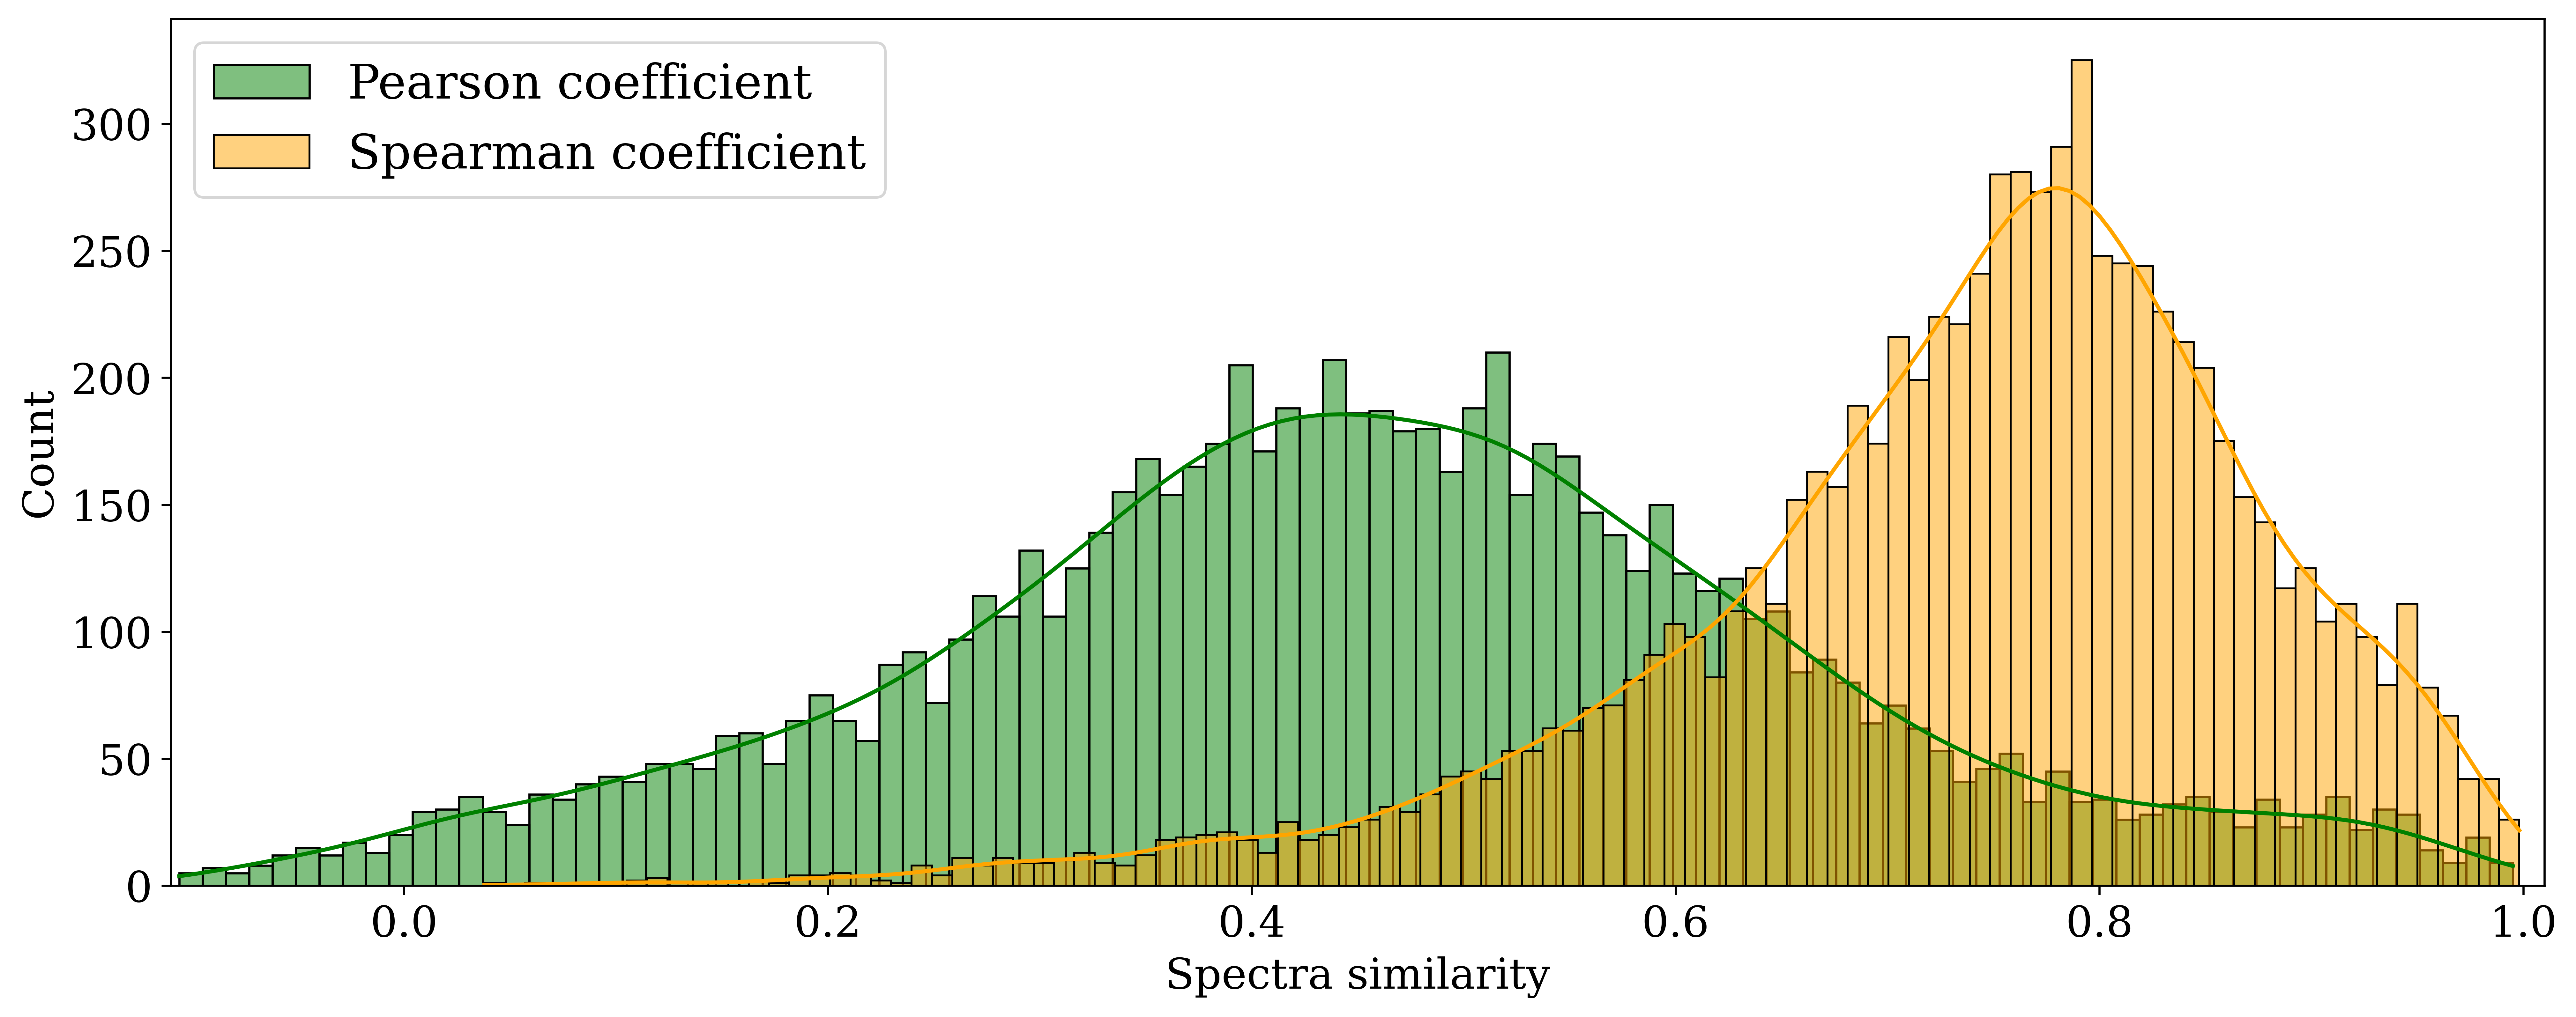

In [13]:
fig = plt.figure(figsize=(16,6), dpi = 600)
plt.rc('font', family='serif', size = 16)
#plt.title("Distribution of spectra similarity measure COR",fontsize=16)
plt.xlabel ("Spectra similarity")
sns.histplot(df2_pearson, label = "Pearson coefficient" ,  kde=True, color="green",bins=100)
sns.histplot(df2_spearman, label = "Spearman coefficient" , kde=True, color="orange",bins=100)
legend = plt.legend(loc='upper left', shadow=False, fontsize=18)
plt.xlim(-0.11, 1.01)
plt.show()
fig.savefig(path+"Figure. DFT total IR spectra similarity histogram of Drug compounds low variance.png",  bbox_inches='tight')

### **df_cid**: pair-wise Tanimoto coefficient matrix

### **df_pair**: nearest neighbor with max Tanimoto coefficient

In [14]:
list_len = df2.shape[0]
test_drug_1 = list(df_label['Drug'])
test_drug_1 = test_drug_1[0:list_len]
test_drug_2 = test_drug_1

df_cid_pearson = pd.DataFrame(0,index=test_drug_1,columns=test_drug_2)
df_cid_spearman = pd.DataFrame(0,index=test_drug_1,columns=test_drug_2)

df_pair_pearson = pd.DataFrame(0,index=test_drug_1,columns=['Pair','MaxValue'])
df_pair_spearman = pd.DataFrame(0,index=test_drug_1,columns=['Pair','MaxValue'])

In [16]:
for i,drug_1 in enumerate(test_drug_1):
    #print(i)
    if i%10 == 0:
        print(i*100/df2.shape[0],'%')
    for j,drug_2 in enumerate(test_drug_2):
        #print(j)
        result =spec_COR(df2.iloc[i,1:],df2.iloc[j,1:])
        df_cid_pearson.loc[drug_1,drug_2] = result[0]
        df_cid_spearman.loc[drug_1,drug_2] = result[1]
    #tmpInd = df_cid.loc[cid_1,df_cid.loc[cid_1,:]!=1].idxmax()
    tmpInd1 = df_cid_pearson.loc[drug_1,drug_1 != df_cid_pearson.columns].idxmax()
    tmpValue1 = df_cid_pearson.loc[drug_1,tmpInd1]   
    df_pair_pearson.loc[drug_1,'Pair'] = tmpInd1
    df_pair_pearson.loc[drug_1,'MaxValue'] = tmpValue1
    
    tmpInd2 = df_cid_spearman.loc[drug_1,drug_1 != df_cid_spearman.columns].idxmax()
    tmpValue2 = df_cid_spearman.loc[drug_1,tmpInd2]   
    df_pair_spearman.loc[drug_1,'Pair'] = tmpInd2
    df_pair_spearman.loc[drug_1,'MaxValue'] = tmpValue2
    
df_pair_pearson = df_pair_pearson.reset_index()
df_pair_spearman = df_pair_spearman.reset_index()

0.0 %
7.874015748031496 %
15.748031496062993 %
23.62204724409449 %
31.496062992125985 %
39.37007874015748 %
47.24409448818898 %
55.118110236220474 %
62.99212598425197 %
70.86614173228347 %
78.74015748031496 %
86.61417322834646 %
94.48818897637796 %


In [17]:
df_cid_pearson.to_csv(path+"Drug DFT total IR spectra Pearson matrix - low variance Unique compounds.csv")
df_pair_pearson.to_csv(path+"Drug DFT total IR spectra Pearson nearest neighbor - low variance Unique compounds.csv", index=False)

In [18]:
df_cid_spearman.to_csv(path+"Drug DFT total IR spectra Spearman matrix - low variance Unique compounds.csv")
df_pair_spearman.to_csv(path+"Drug DFT total IR spectra Spearman nearest neighbor - low variance Unique compounds.csv", index=False)

### Heatmap and clustering of NPS reference compounds according to 
Spectra COR Matrix

In [46]:
df_matrix = pd.read_csv(path+"Drug DFT total IR spectra Pearson matrix - low variance Unique compounds.csv",index_col='Unnamed: 0')

In [47]:
Data = df_matrix.values
#Data = df.iloc[:,1:].values
df_matrix.head(2)

,Heroin,Morphine,Acetylcodeine,Codeine,Hydrocodone,Oxycodone,Hydromorphone,Oxymorphone,Naltrexone,Naloxone,...,2C-T-30,2C-T-31,2C-T-33,Psilocin,DMT,DiPT,4-HO-DiPT,4-HO-MET,5-MeO-AMT,5-MeO-MiPT
Heroin,1.000000,0.633781,0.867398,0.485923,0.510617,0.518993,0.650343,0.677575,0.723136,0.681945,...,0.509514,0.460551,0.517223,0.002709,0.156439,0.226822,0.409278,0.374507,0.531878,0.544825
Morphine,0.633781,1.000000,0.723389,0.818494,0.655970,0.644081,0.766771,0.770667,0.731916,0.608546,...,0.717612,0.626036,0.625954,0.072036,0.404303,0.469261,0.580079,0.564370,0.706044,0.781279


In [48]:
method = "ward"
Z_1 = linkage(Data, method='ward')
Pdist = pdist(Data)
c, coph_dists = cophenet(Z_1, Pdist)
print(c)

0.5649471592689619


/opt/anaconda3/envs/my-rdkit-env/lib/python3.9/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1008x1152 with 0 Axes>

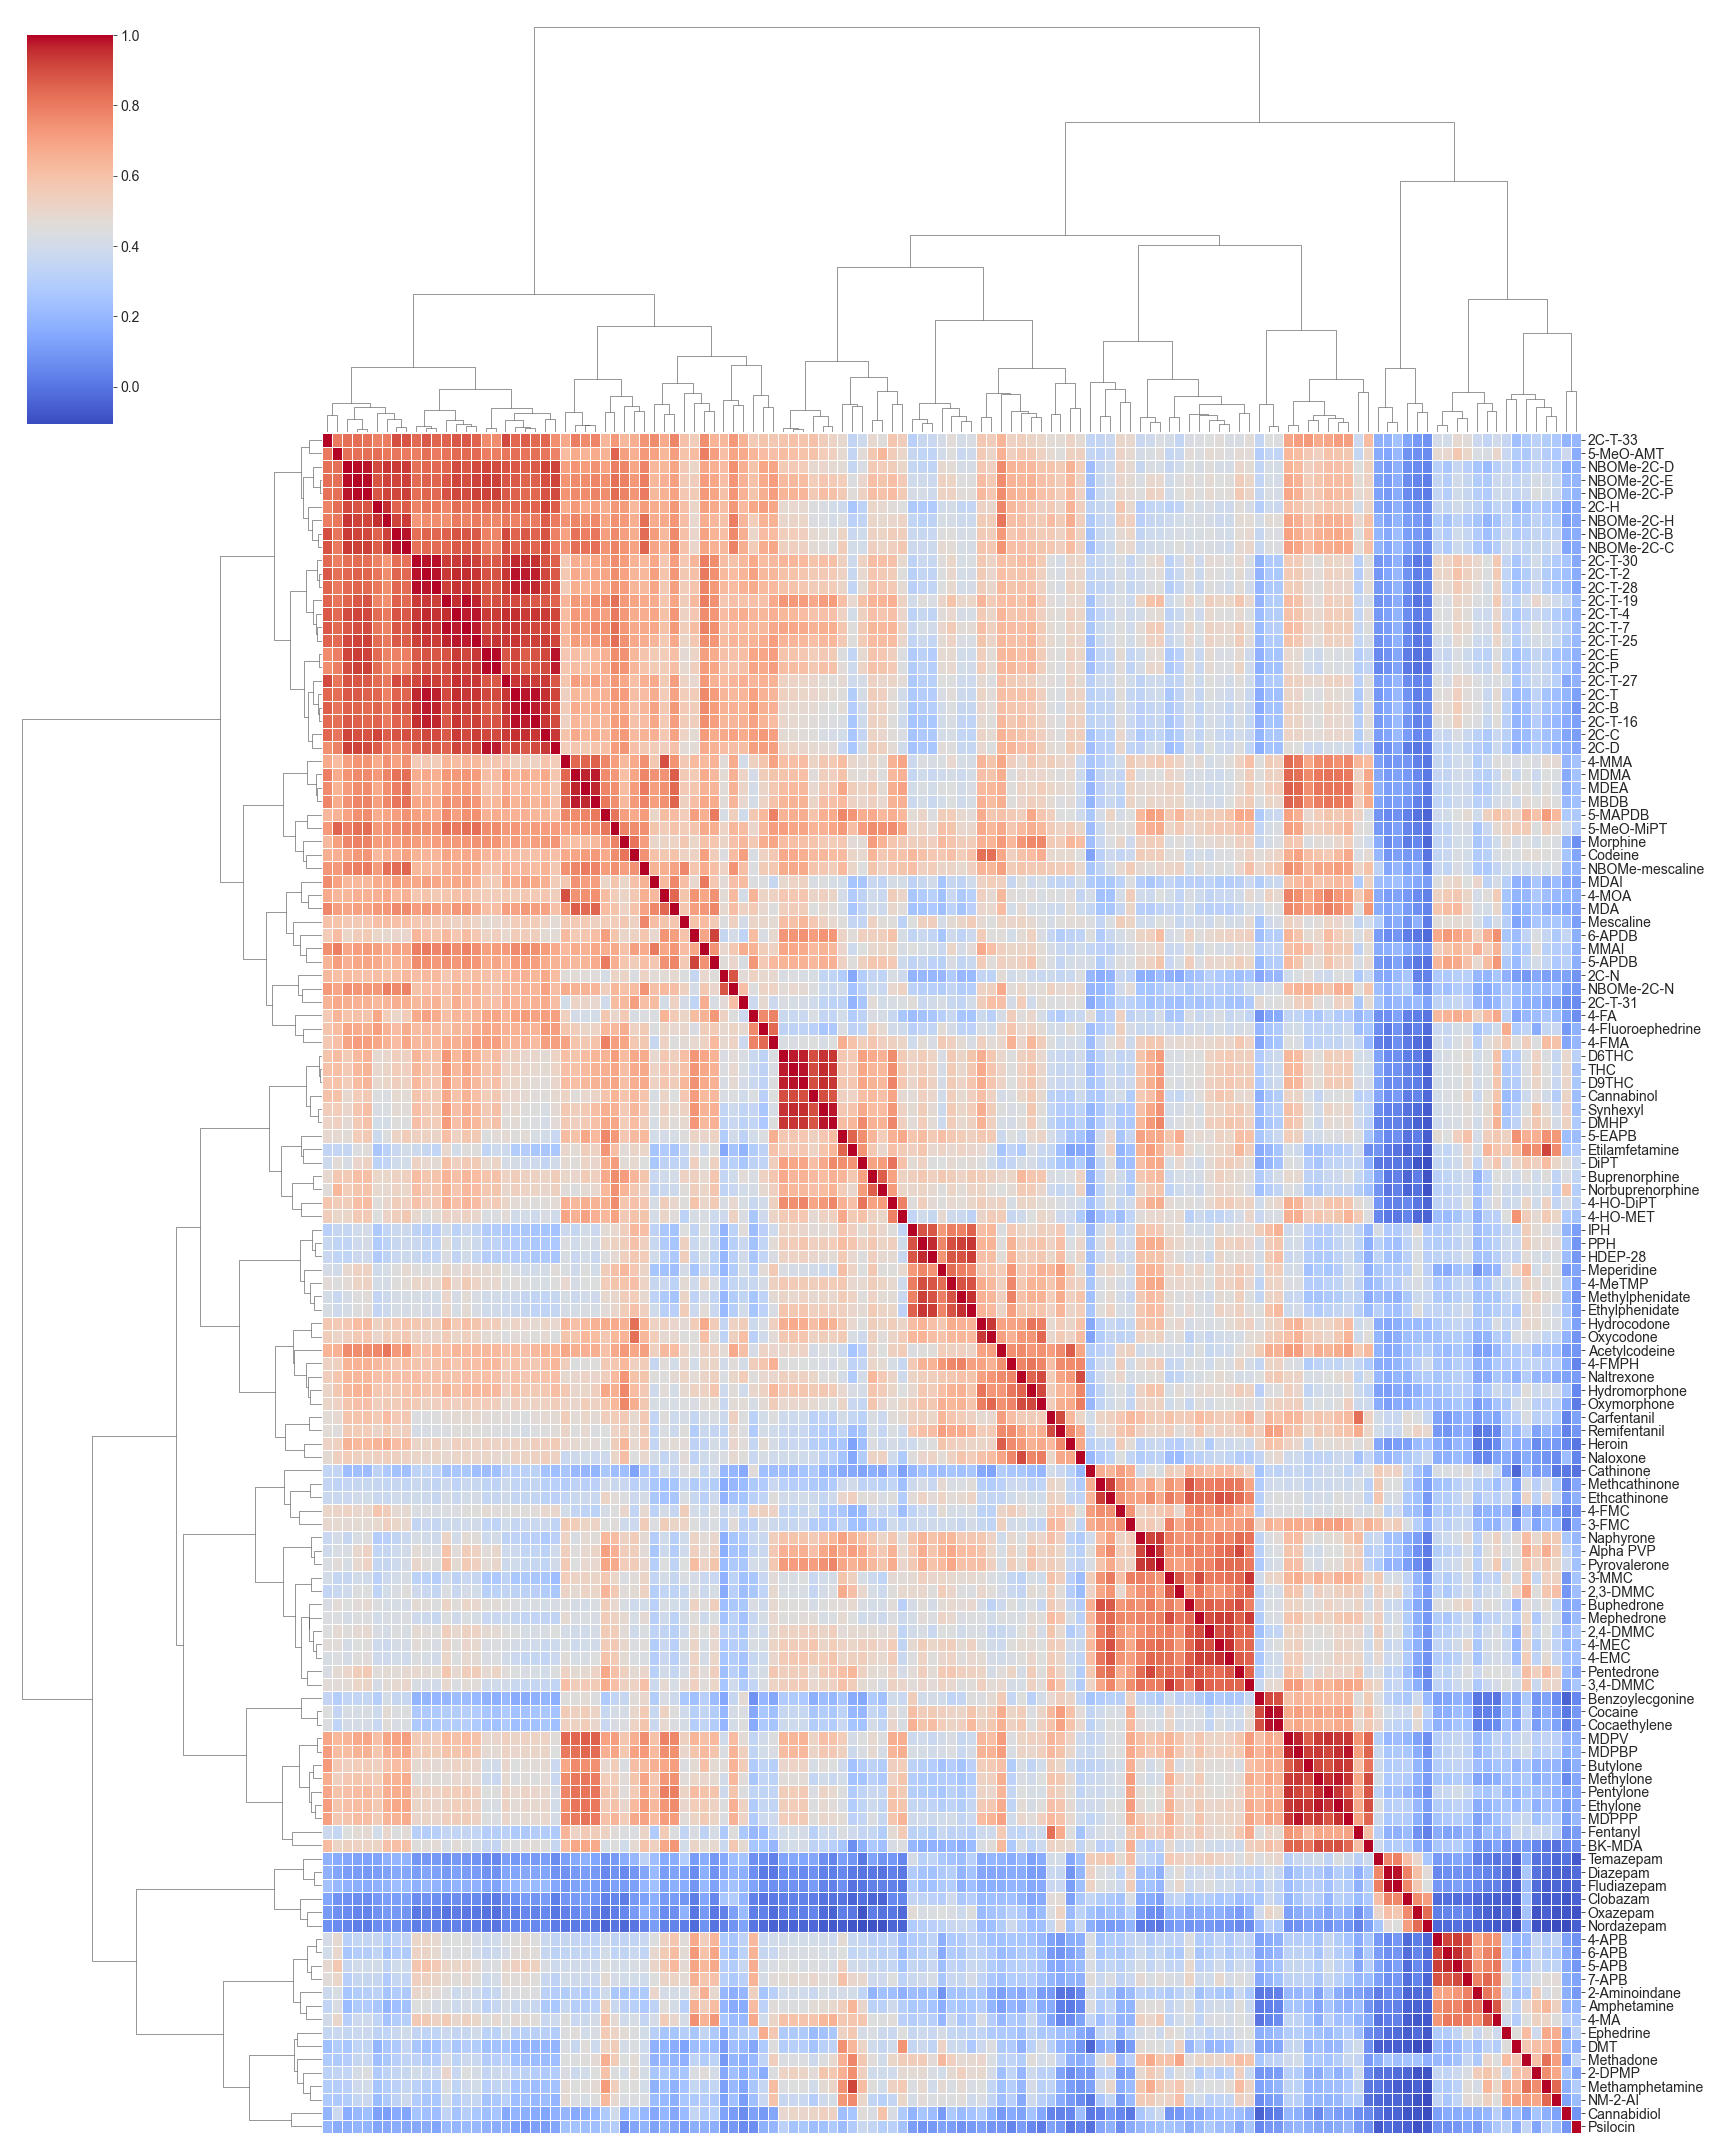

In [49]:
yticklabels= df_matrix.index
fig = plt.figure(figsize=(14,16))
plt.rc('font', family='serif', size = 14)
sns.set_style('white')
fig = sns.clustermap(Data, method=method,cmap='coolwarm',fmt='d', linewidth=.5, xticklabels=False, yticklabels=yticklabels,figsize=(24,30))
plt.rc('font', family='serif', size = 12)
plt.show()
fig.savefig(path+"Figure. Heatmap of the total IR Pearson correlation similarity clustering of Drug compounds.png",dpi = 600,bbox_inches='tight')

In [50]:
silhouette,n_clu = list(),list()
for num_cluster in range(2, 50):
    cluster_nodes= fcluster(Z_1,num_cluster,criterion='maxclust')
    score = silhouette_score(Data, cluster_nodes, metric='euclidean')
    silhouette.append(score)
    n_clu.append(num_cluster)
print("maximum average silhouette score: %0.4f" % max(silhouette))

result = zip(n_clu,silhouette)
zipped_result = list(result)
df_result = pd.DataFrame(zipped_result,columns=['n_clusters','average_silouette'])

# optimal K with Spectra COR
df_result[df_result['average_silouette']==max(silhouette)]

maximum average silhouette score: 0.3739


,n_clusters,average_silouette
15,17,0.373931


In [51]:
df_result.head(10)

,n_clusters,average_silouette
0,2,0.229869
1,3,0.250190
2,4,0.279361
3,5,0.276797
4,6,0.309818
5,7,0.325435
6,8,0.307090
7,9,0.326324
8,10,0.341289
9,11,0.344066


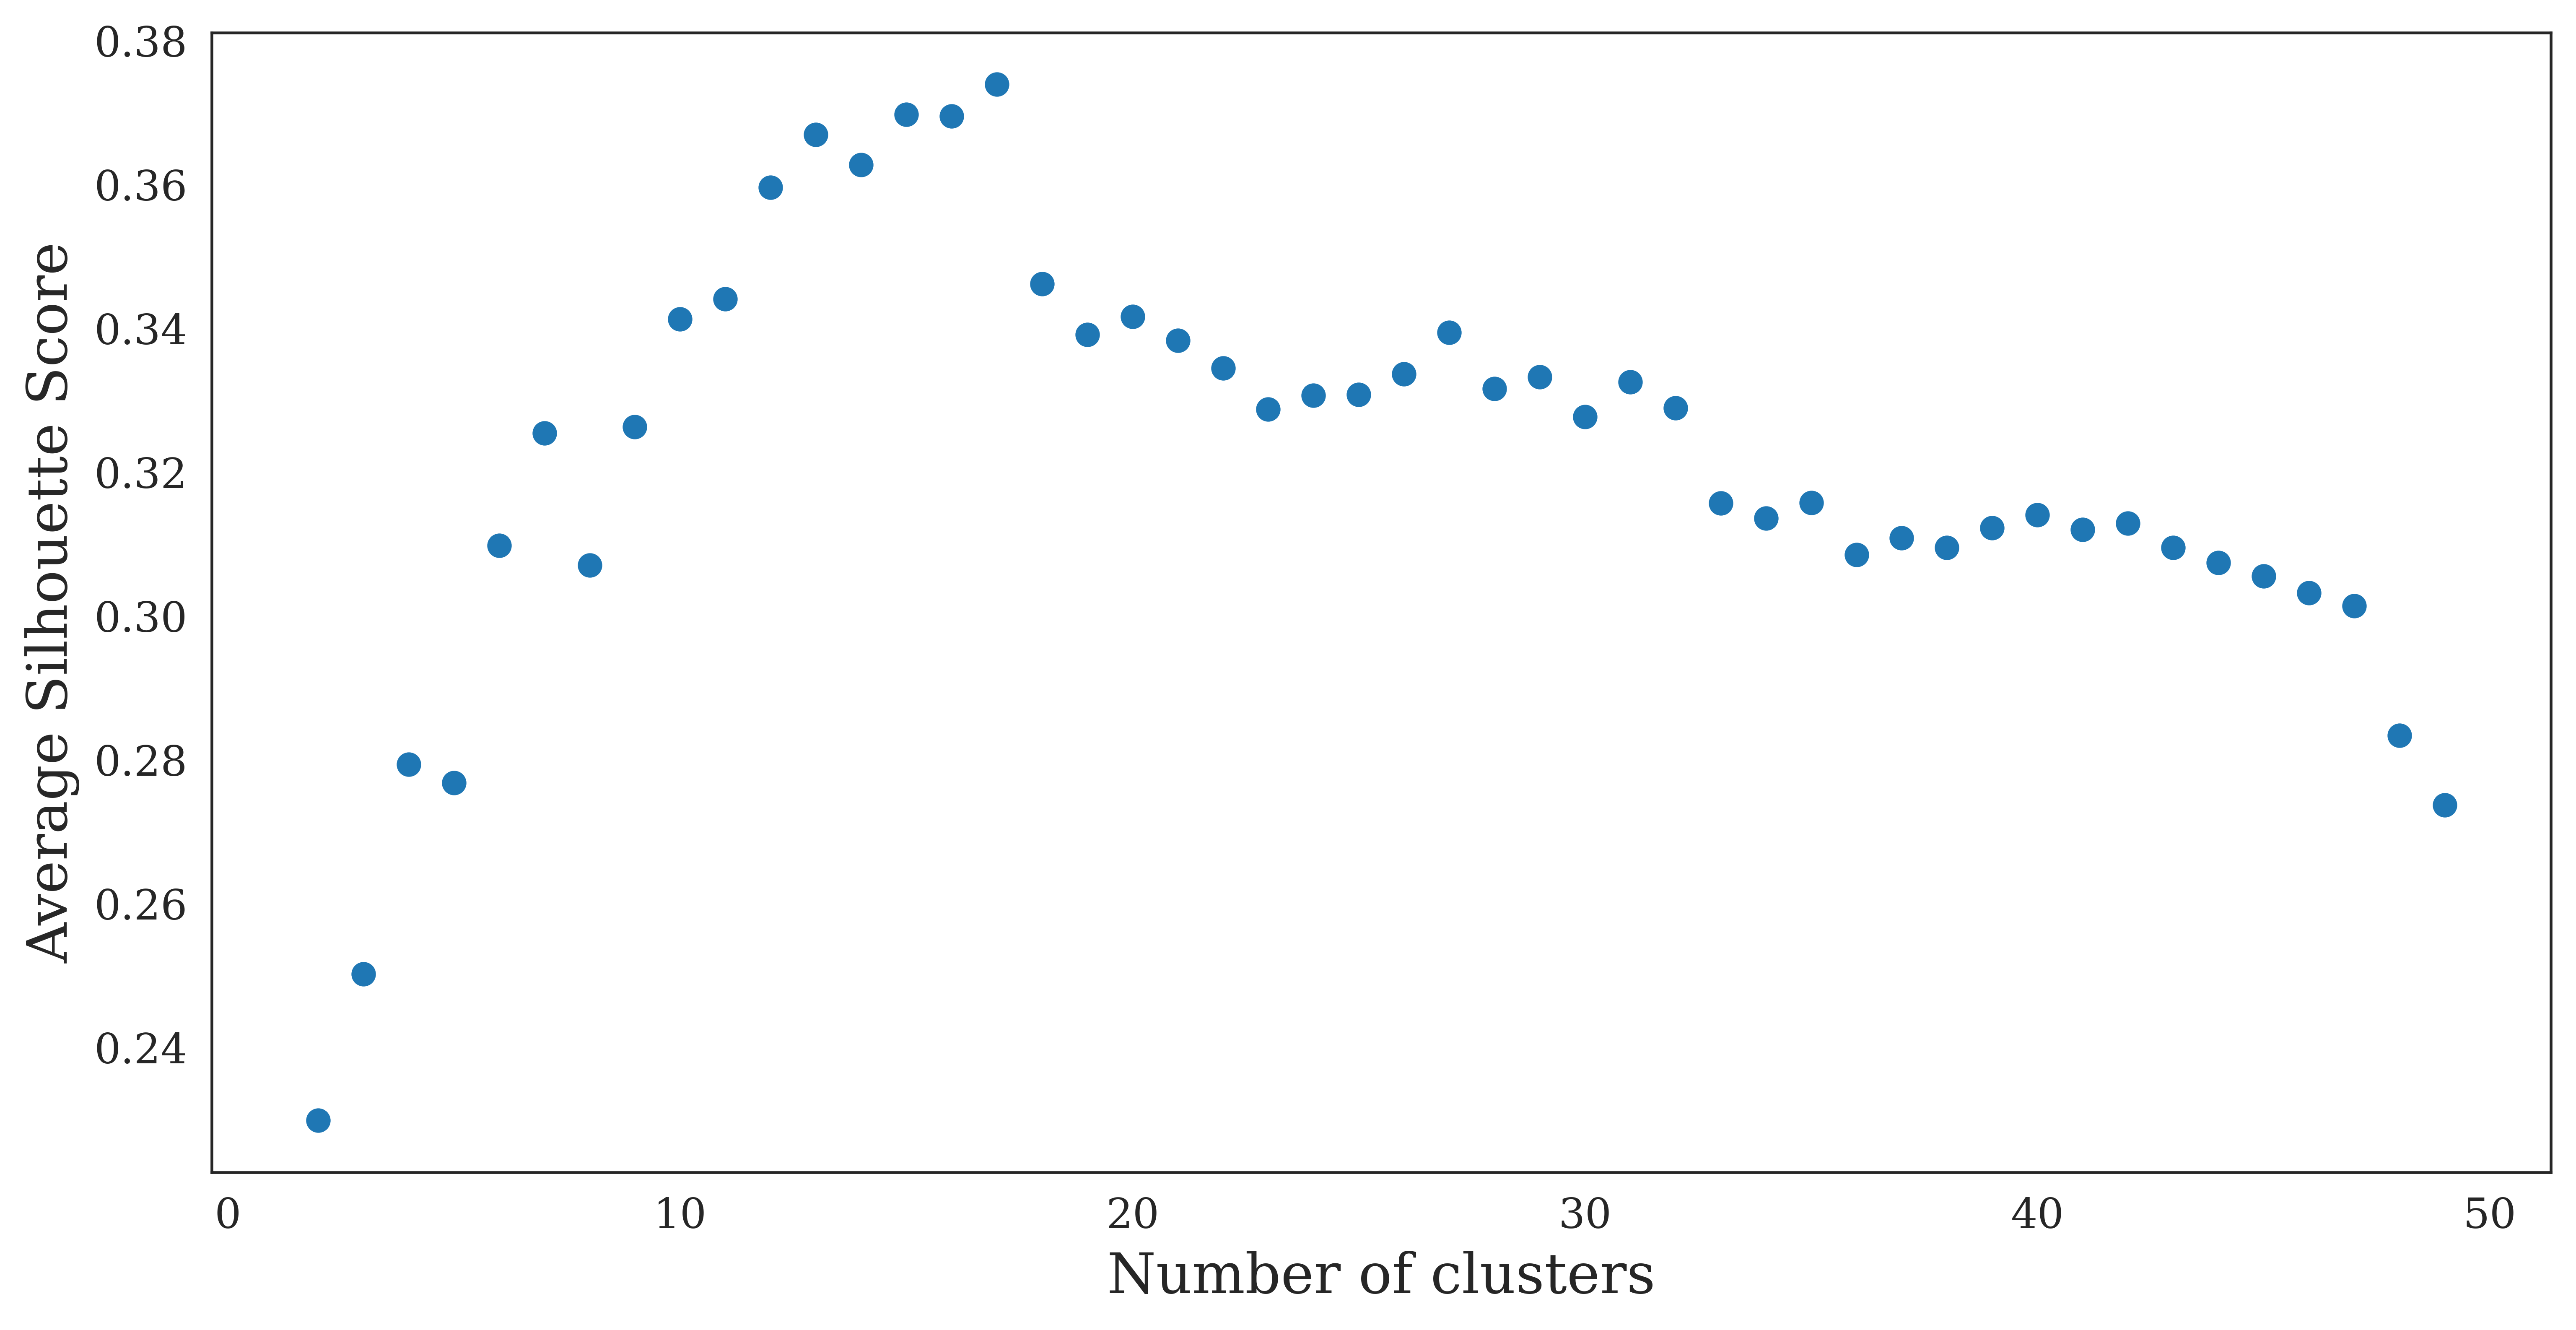

In [52]:
fig = plt.figure(figsize=(12,6), dpi = 600)
plt.rc('font', family='serif')
plt.scatter(n_clu,silhouette)
plt.xlabel("Number of clusters", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=16)
plt.show()

fig.savefig(path+"Figure. Silhouette analysis for determining optimal clusters K using total IR Pearson.png", bbox_inches='tight')

In [53]:
#distance cutoff
t = np.arange(0.5, 5,0.1)
silhouette= list()
clusters = list()
for i in range(len(t)):
    #print(t[i])
    #Getting cluster labels
    cluster_nodes= fcluster(Z_1,t[i],criterion='distance')
    clusters.append(max(cluster_nodes))
    #Calculate average silhouette score
    score = silhouette_score(Data, cluster_nodes, metric='euclidean')
    
    silhouette.append(score)

print("maximum average silhouette score: %0.4f" % max(silhouette))

result = zip(t,silhouette,clusters)
zipped_result = list(result)
df_result = pd.DataFrame(zipped_result,columns=['t_cutoff','average_silouette','K'])

df_result[df_result['average_silouette']==max(silhouette)]

maximum average silhouette score: 0.3739


,t_cutoff,average_silouette,K
23,2.8,0.373931,17


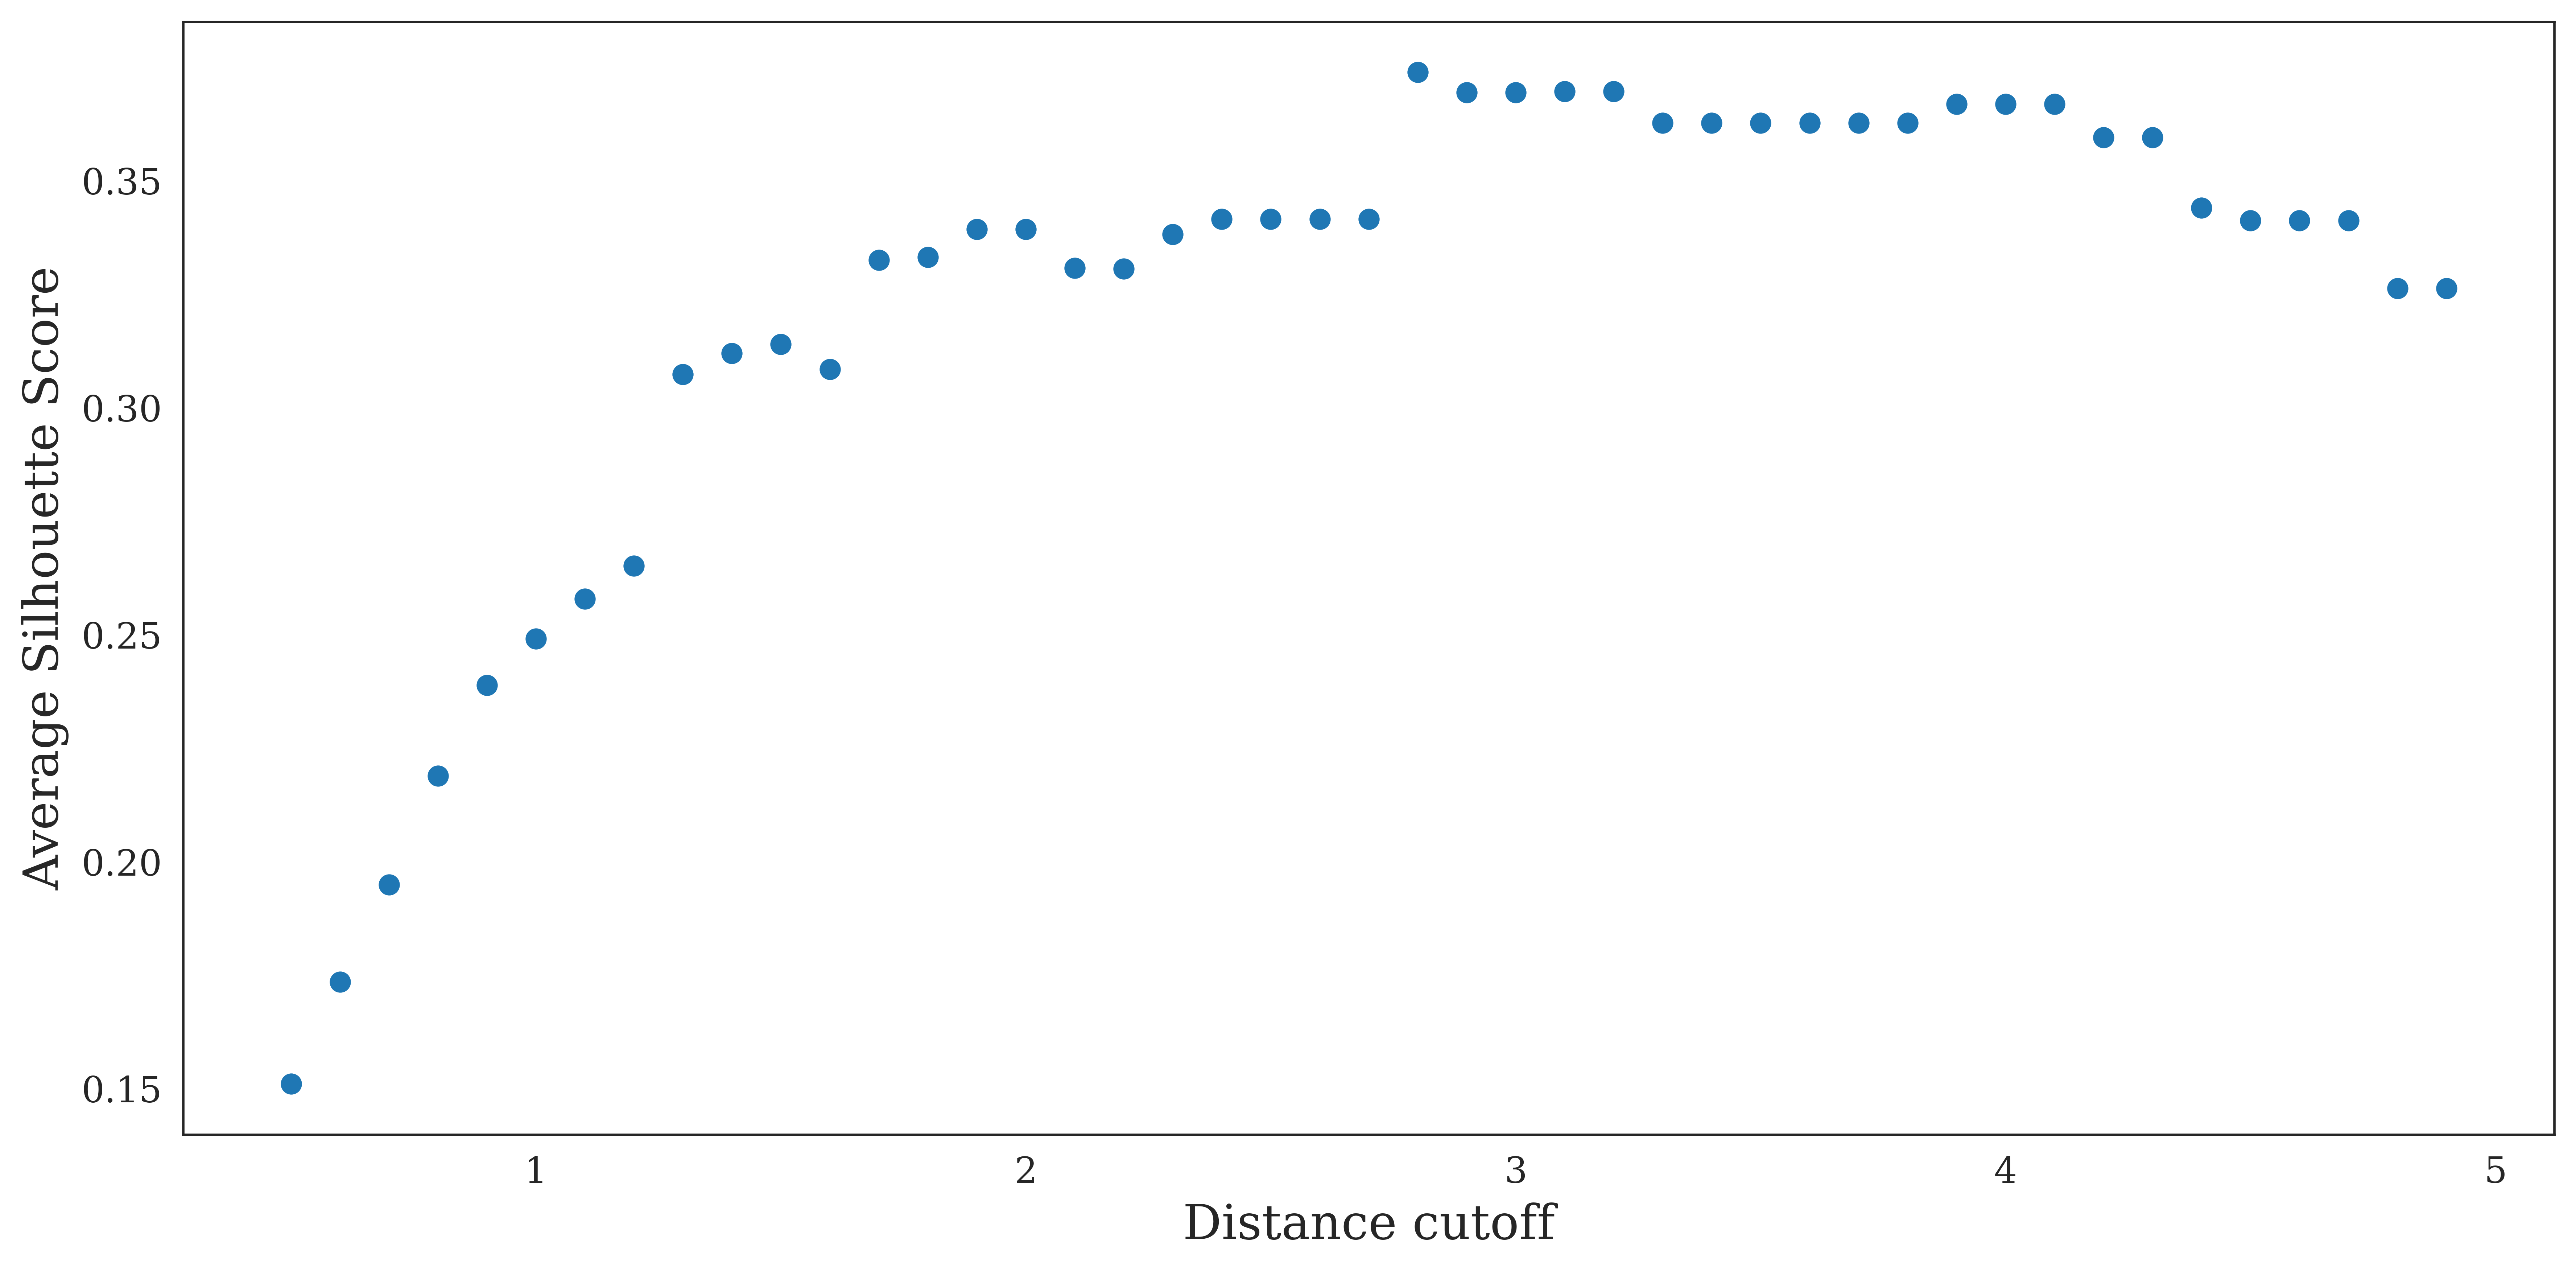

In [54]:
fig = plt.figure(figsize=(12,6), dpi = 600)
plt.rc('font', family='serif')
plt.scatter(t,silhouette)

plt.xlabel("Distance cutoff", fontsize=16)
plt.ylabel("Average Silhouette Score", fontsize=16)
fig.tight_layout()
plt.show()

fig.savefig(path+"Figure. Silhouette analysis for determining optimal clusters K using total IR Pearson with distance cutoff.png", bbox_inches='tight')

In [55]:
cluster_nodes = fcluster(Z_1,16,criterion='maxclust')

In [56]:
df_class = pd.read_csv(path+"Drugs Canonical Smiles and Fingerprints and optimal K - Unique compounds.csv", dtype=object)

In [57]:
df_class.head()

,Name,Formula,MW,CAS,PubChem CID,RotBondCount,Conformers,Class,Pharm class,Chem core,Canonical SMILES,maccsfp,MACCS_K,MCS_K,Pearson_K,Spearman_K,Morgan_K,E3FP_K,Spearman_total_IR_K
0,Heroin,C21H23NO5,369.4,561-27-3,5462328,4,10,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...,0000000000000000000000000000000000000000000000...,14,9,11,7,4,12,13
1,Morphine,C17H19NO3,285.34,57-27-2,5288826,0,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9,3,13,4,12,8
2,Acetylcodeine,C20H23NO4,341.4,6703-27-1,5486550,3,3,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC)CCN3C,0000000000000000000000000000000000000000000000...,14,9,11,7,4,12,13
3,Codeine,C18H21NO3,299.4,76-57-3,5284371,1,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9,3,13,4,12,8
4,Hydrocodone,C18H21NO3,299.4,125-29-1,5284569,1,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)OC)OC3C(=O)CC4,0000000000000000000000000000000000000000000000...,14,9,11,7,5,12,13


In [58]:
df_class['Pearson_total_IR_K'] = pd.Series(cluster_nodes, index=df_class.index)

In [59]:
df_class.head(2)

,Name,Formula,MW,CAS,PubChem CID,RotBondCount,Conformers,Class,Pharm class,Chem core,Canonical SMILES,maccsfp,MACCS_K,MCS_K,Pearson_K,Spearman_K,Morgan_K,E3FP_K,Spearman_total_IR_K,Pearson_total_IR_K
0,Heroin,C21H23NO5,369.4,561-27-3,5462328,4,10,1,Opioids,Alkaloid,CC(=O)OC1C=CC2C3CC4=C5C2(C1OC5=C(C=C4)OC(=O)C)...,0000000000000000000000000000000000000000000000...,14,9,11,7,4,12,13,8
1,Morphine,C17H19NO3,285.34,57-27-2,5288826,0,1,1,Opioids,Alkaloid,CN1CCC23C4C1CC5=C2C(=C(C=C5)O)OC3C(C=C4)O,0000000000000000000000000000000000000000000000...,14,9,3,13,4,12,8,2


In [60]:
df_class.to_csv(path+"Drugs Canonical Smiles and Fingerprints and optimal K - Unique compounds.csv",index=False)